In [1]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import json

In [2]:
# Load the saved model file
vgg16_loaded_model = load_model('vgg16_plant_identification_model.h5')

In [3]:
# Display the loaded model's summary
vgg16_loaded_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │        11,286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,988,632 (57.18 MB)

 Trainable params: 273,942 (1.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [4]:
# Load the class indices
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
class_indices = {int(k): v for k, v in class_indices.items()}

In [5]:
# Function to preprocess and predict
def predict_image_class_with_probabilities(model, image_path, class_indices):
    def load_and_preprocess_image(image_path, target_size=(224, 224)):
        img = Image.open(image_path).resize(target_size)
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        return img_array

    # Preprocess the image
    preprocessed_img = load_and_preprocess_image(image_path)

    # Predict probabilities
    predictions = model.predict(preprocessed_img)

    # Get class probabilities and predicted class
    class_probabilities = {class_name: round(prob * 100, 2) for class_name, prob in zip(class_indices.values(), predictions[0])}
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_indices[predicted_class_index]
    predicted_class_prob = class_probabilities[predicted_class_name]

    return predicted_class_name, predicted_class_prob, class_probabilities


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


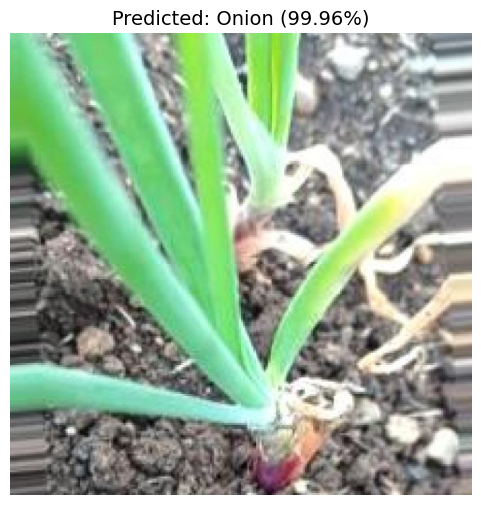

In [7]:
# Path to the image
image_path = '/Users/aniketanilpalse/Downloads/Vishwakarma_University_(VU) /Sem-VI/Z_(Hackaton, Mega Project)/02_Mega_Project/Z_Dataset/Plant Identification/test/Onion/aug_0_1413_jpg.rf.10f9c59013817b0807b778edd364bb8f.jpg'  # Update this with your actual image path

# Predict using the loaded model
predicted_class_name, predicted_class_prob, class_probabilities = predict_image_class_with_probabilities(
    vgg16_loaded_model, image_path, class_indices
)

# Display results
img = mpimg.imread(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class_name} ({predicted_class_prob}%)", fontsize=14)
plt.show()

In [8]:
# Print class probabilities
print("Class Probabilities:")
for class_name, prob in sorted(class_probabilities.items()):
    print(f"{class_name}: {prob:.2f}%")

Class Probabilities:
Adulsa: 0.00%
Alovera: 0.03%
Amla: 0.00%
Banana: 0.00%
Beetal Leaf (Pan): 0.00%
Bramhi: 0.00%
Curry Leaves: 0.00%
Drumstick: 0.00%
Eranda: 0.00%
Gokarna: 0.00%
Hibiscus: 0.00%
Jamun (Indian Blackberry): 0.00%
Mango: 0.01%
Neem: 0.00%
Onion: 99.96%
Panfuti: 0.00%
Papaya: 0.00%
Satynashi: 0.00%
Shatavari: 0.00%
Sugarcane: 0.00%
Tandulja: 0.00%
Touch Me Not: 0.00%
